# Выбор локации для скважины

Нефтедобывающей компании нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

*   В избранном регионе ищут месторождения, для каждого определяют значения признаков;
*   Строят модель и оценивают объём запасов;
* Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
* Прибыль равна суммарной прибыли отобранных месторождений.

Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Нужно построить модель для определения региона, где добыча принесёт наибольшую прибыль, проанализировать риски.

## Загрузка и подготовка данных
### Загрузка и исследование данных
Данные геологоразведки находятся в трёх фалах. Загрузим их, попутно проведём исследование. Названия файлов проиндексированы с 0, для удобства будем считать первым регион, которому соответствует файл geo_data_0:

In [1]:
#подключение используемых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Общие сведения о данных из файла geo_data_0, представленых в DataFrame `area_1`:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные статические показатели переменных DataFrame `area_1`:


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,fiKDv,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


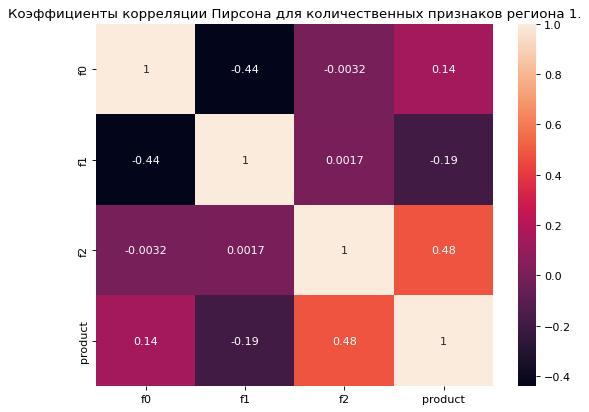

<Figure size 1280x720 with 0 Axes>

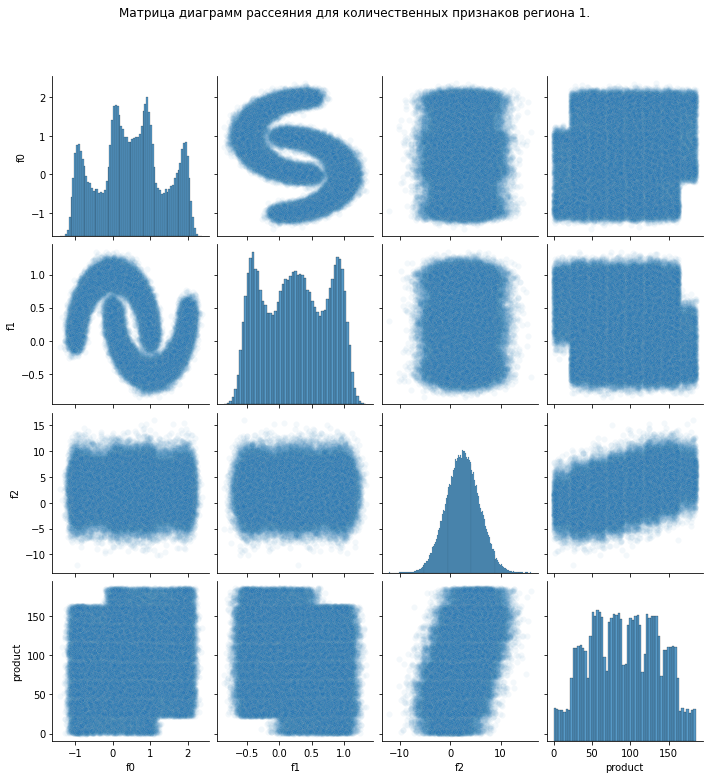


Общие сведения о данных из файла geo_data_1, представленых в DataFrame `area_2`:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные статические показатели переменных DataFrame `area_2`:


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,wt4Uk,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


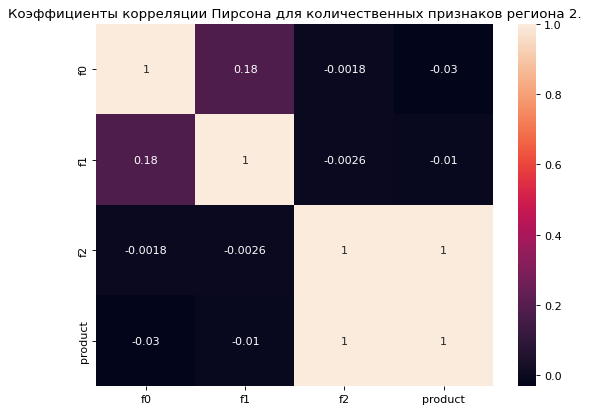

<Figure size 1280x720 with 0 Axes>

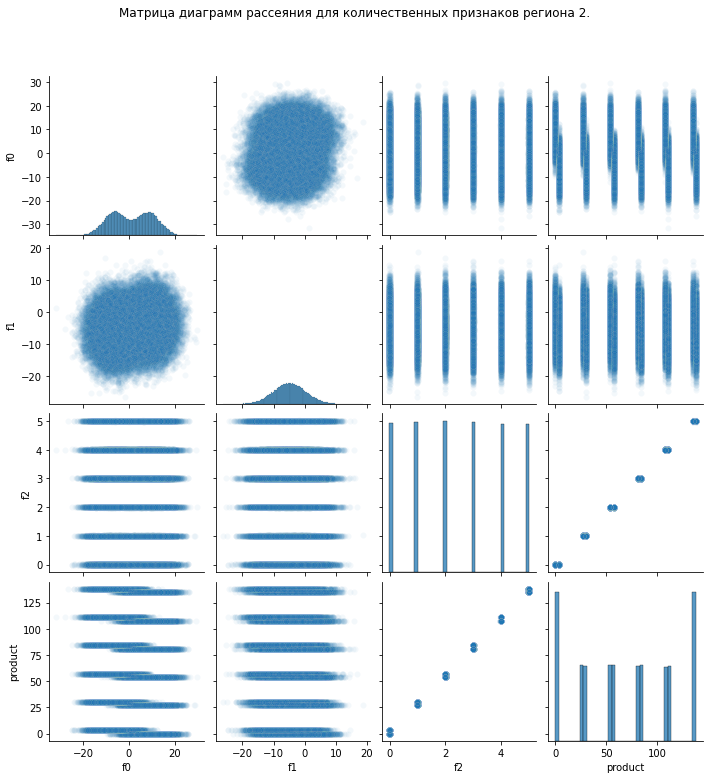


Общие сведения о данных из файла geo_data_2, представленых в DataFrame `area_3`:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные статические показатели переменных DataFrame `area_3`:


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,VF7Jo,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


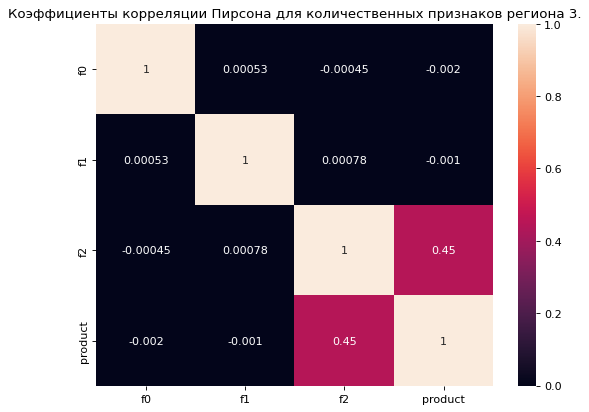

<Figure size 1280x720 with 0 Axes>

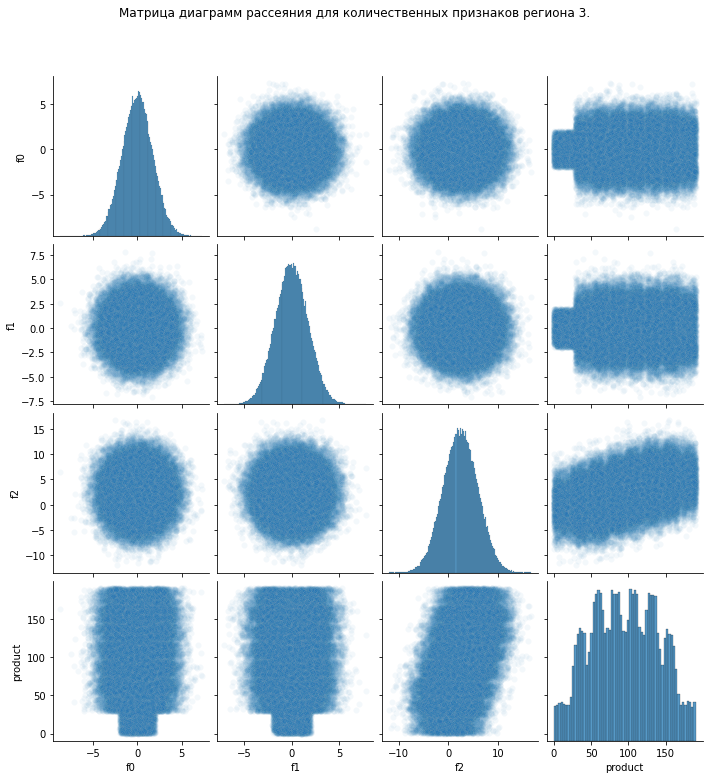

In [3]:
#чтение и исследование данных
for i in range(0, 3):    
    j = str(i+1)
    i = str(i)
    try:
        globals()['area_' + j] = pd.read_csv(
            '/content/drive/My Drive/Colab Notebooks/datasets/'
            + 'geo_data_'
            + i
            + '.csv',
            sep=','
        )
        print(f"Общие сведения о данных из файла {'geo_data_' + i}, представленых в DataFrame `{'area_' + j}`:")
        print(globals()['area_' + j].info())
        print(f"\nОсновные статические показатели переменных DataFrame `{'area_' + j}`:")
        display(globals()['area_' + j].describe(include='all'))
        print()
        plt.figure(figsize=(8, 6), dpi=80)
        sns.heatmap(globals()['area_' + j].drop(columns='id', axis=1).corr(), annot=True)
        plt.title(f'Коэффициенты корреляции Пирсона для количественных признаков региона {j}.')
        plt.show()
        print()
        plt.figure(figsize=(16, 9), dpi=80)
        sns.pairplot(globals()['area_' + j].drop(columns='id', axis=1), kind='scatter', plot_kws=dict(alpha=0.05)).fig.suptitle(
            f'Матрица диаграмм рассеяния для количественных признаков региона {j}.', y=1.08)
        plt.show()
        print()
    except FileNotFoundError:
        print('Указан некорректный путь. Проверьте путь к файлу.')

### Вывод
##### Признаки
 - `id` — уникальный идентификатор скважины;  
 - `f0`, `f1`, `f2` — некоторые значимые признаки скважин;  
 - `product` — объём запасов в скважине (тыс. баррелей).
 ###### Соответствие типов
 Независимо от типа региона, исходя из смысла признаков, можно сказать, что количественному признаку `product` должна соответствовать непрерывная количественная величина, а категориальному `id`, в общем случае, некоторые значения, выражающие принадлежность к категории, в данном конкретном случае - некоторые строки. Во всех трёх регионах, и, соответственно, файлах с данными геологоразведки и полученных из них DataFrame'ах, им соответствуют подходящие типы данных.  
 `f0`, `f1` и `f2`, для всех регионов представлены как непрерывная количественная величина (для 2-го региона заметна определенная дискретизация, скорее всего, вызванная сравнительно низкой чувствительностью измерительного оборудования или другими факторами), судя по всему, это - некоторые количественные признаки.  
 Конвертация типа данных не требуется.
 ###### Пропущенные значения
 Данные не имеют явных пропущенных значений, и, судя по распределениям, неявных пропущенных значений.  
 Обработка пропущенных значений не требуется.
 ###### Дубликаты
 В данных имеются дубликаты, это видно из описательных статистик признака `id` для всех трех регионов. Можно заметить следующее - максимальное число дубликатов для скважины 1 (частота самых частых значений `id` - 2, т.е. оригинал и дубликат), а таких значений сравнительно не много:

In [4]:
for i in range(1,4):
    print(f"Доля объектов-дубликатов для {i}-го региона: {globals()['area_'+str(i)]['id'].duplicated().mean():.3%}.")

Доля объектов-дубликатов для 1-го региона: 0.010%.
Доля объектов-дубликатов для 2-го региона: 0.004%.
Доля объектов-дубликатов для 3-го региона: 0.004%.


Избавимся от дубликатов, удалив их:

In [5]:
for i in range(1,4):
    globals()['area_'+str(i)].drop_duplicates(subset='id', inplace=True)
    if globals()['area_'+str(i)]['id'].duplicated().sum() == 0:
        print(f"Дубликаты для {i}-го региона успешно удалены.")
    else:
        print('Удаление дубликатов прошло с ошибкой.')

Дубликаты для 1-го региона успешно удалены.
Дубликаты для 2-го региона успешно удалены.
Дубликаты для 3-го региона успешно удалены.


Уникальные `id` скважин больше нам не нужны - дубликаты определены и успешно удалены, а для обучения моделей этот признак не будет полезным.

###### Распределения
Распределения всех количественных признаков для всех регионов, судя по описательным характеристикам распределений и гистограммам на матрице диаграмм рассеяния, похожи на нормальные, только для второго региона значения признаков `f2` и `product` распределены со скошенностью вправо, скважин с `product` выше среднего в регионе в данных больше (но это еще не означет, что этот регион лучше остальных).
###### Корреляция признаков
Сильной линейной корреляции между нецелевыми признаками нет, такая корреляции наблюдается только для признака `f2` и целевого признака во втором регионе (стоит отметить, что в отличие от двух других регионов, эти два признака в данном случае имеют большой шаг дискретизации - вероятно, оборудование, определяющее значение этих параметров, здесь было менее чувствительным, что, возможно, и привело к такому результату).
Говоря о диаграммах рассеяния, можно заметить, что в каждом регионе взаимозависимости различаются между собой, но везде заметно, что области точек ограничены четкими линиями, подчиняющимися определенным математическим законам (поскольку эти признаки имеют физическую природу и, вероятно, между величинами действуют определенные физические соотношения, которые отражают линейные закономерности).  
`f0` и `f1` во всех регионах, как правило, ограничивают области с экстремальными значениями целевого признака, в то время как `f2` с целевым признаком взаимозависят линейно, с некоторым разбросом.  

### Подготовка данных
Как было замечено, в каждом регионе свой характер взаимозависимостей, отличаются экстремальные значения параметров, поэтому для каждого региона целесообразно использовать свою модель.
Все признаки количественные, для одного региона разные признаки имеют разный диапазон значений, их нужно отмасштабировать, подготовив для каждого региона свою обучающую и валидационную выборку.

#### Масштабирование
Не все признаки распределены нормально, а каждому региону будет соответствовать своя модель: для регионов с нормальным распределение всех признаков отмасштабируем признаки с помощью стандартизации, для остальных (2-го региона) - исходя из диапазона значений признака:

In [6]:
for i in range(1, 4):
    i = str(i)
    features = globals()['area_' + i].drop(['product', 'id'], axis=1)
    target = globals()['area_' + i]['product']
    globals()['features_train_' + i],\
    globals()['features_valid_' + i],\
    globals()['target_train_' + i],\
    globals()['target_valid_' + i] = train_test_split(features, target, test_size=0.25, random_state=42)
    if i == '2':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    scaler.fit(globals()['features_train_' + i])
    globals()['features_train_' + i] = scaler.transform(globals()['features_train_' + i])
    globals()['features_valid_' + i] = scaler.transform(globals()['features_valid_' + i])

## Обучение и проверка модели
Обучим модели для всех трёх регионов. По условию для обучения моделей подходит только линейная регрессия (остальные — недостаточно предсказуемые).

In [7]:
result = {'region': [],
         'mean_product': [],
         'RMSE': [],
         'r2': []}
for i in range(1, 4):
    i = str(i)
    result['region'].append(i)
    globals()['model_' + i] = LinearRegression(n_jobs=-1)
    globals()['model_' + i].fit(globals()['features_train_' + i], globals()['target_train_' + i])
    globals()['predictions_' + i] = globals()['model_' + i].predict(globals()['features_valid_' + i])
    result['mean_product'].append(globals()['predictions_' + i].mean())
    result['r2'].append(globals()['model_' + i].score(globals()['features_train_' + i], globals()['target_train_' + i]))
    result['RMSE'].append(mean_squared_error(globals()['target_valid_' + i], globals()['predictions_' + i]) ** 0.5)
    globals()['product_' + i] = pd.DataFrame(
        {'true': globals()['target_valid_' + i].tolist(), 'predicted': globals()['predictions_' + i]}
    )
pd.DataFrame(result).style.hide_index()

region,mean_product,RMSE,r2
1,92.609840,37.685089,0.276052
2,68.577035,0.892827,0.999625
3,94.934787,40.080822,0.200094


### Вывод
Результаты моделей для 1-го и 3-го регионов далеки от идеала: они работают ощутимо лучше заполнения средним значением, но значительно хуже идеальной модели (r2 > 0, r2 < 1), RMSE в финансовом эквиваленте около 17 и 18 млн. рублей за точку соответственно, такова средняя цена ошибки, при средней выручки с точки 41,7 и 42,7 млн. рублей соответственно. Модель для второго региона работает почти как идеальная модель, однако, вероятно, это связано с низким качеством оборудования, используемого при геологоразведке этого региона, очень низкая частота дискретизации.  
В данном случае, я бы рекомендовал подумать о том, чтобы пожертвовать интерпретирумостью и предсказуемостью и использовать алгоритмы на основе деревьев или ближайших соседей с кросс-валидацией и проверкой на отложенной выборке - да, такие модели менее предсказуемые, но, если метрики на отложенной выборке будут похожи на метрики кросс-валидации, можно сказать, что модель достаточно устойчива, и, скорее всего, её качество будет выше модели, использующей в основе алгоритм линейной регрессии, а, значит, и цена ошибки, будет меньше.

## Подготовка к расчёту прибыли
Все ключевые значения для расчётов сохраним в отдельных переменных.  
Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [8]:
BUDGET = 10_000_000_000
BARREL_COST = 450
BARRELS_IN_UNIT = 1000
UNIT_COST = BARREL_COST * BARRELS_IN_UNIT
TOTAL_POINTS = 500
POINTS = 200

Найдём минимальный объём сырья, необходимый для безубыточной разработки новой скважины:

In [9]:
MIN_UNITS_FOR_POINT = BUDGET / POINTS / UNIT_COST
print(f"Минимальный объём сырья для безубыточной разработки новой скважины: {MIN_UNITS_FOR_POINT}.")

for i in range(1, 4):
    i = str(i)
    print(f"Средний запас сырья в регионе {i}: {globals()['area_' + i]['product'].mean()}.")


Минимальный объём сырья для безубыточной разработки новой скважины: 111.11111111111111.
Средний запас сырья в регионе 1: 92.49968421774354.
Средний запас сырья в регионе 2: 68.82391591804064.
Средний запас сырья в регионе 3: 94.99834211933378.


Напишем функцию для расчёта прибыли по 200 скважинам с максимальными прогнозируемыми запасами сырья:

In [10]:
def profit(prod=globals()['product_' + str(i)], values='true'):
    real_product_of_top_predicted = prod.sort_values(by='predicted', ascending=False)[values][:POINTS]
    return round((real_product_of_top_predicted.sum() * UNIT_COST) - BUDGET, 2)

### Вывод
Средний запас сырья в регионе ниже миниального объёма сырья для безубыточной разработки новой скважины, но это еще не значит, что разработка новых скважин в любом регионе будет убыточной.
<details> <summary>Нельзя просто так взять  скважины для разработки наугад, только такой вывод можно сделать на данном этапе.</summary> <img src="https://citaty.info/files/portraits/maxresdefault.jpg"> </details> Именно для этого мы и разрабатывали модель - будем разрабатывать те скважины, для которых прогнозируемый запас сырья будет больше.

## Расчёт прибыли и рисков 
Посчитаем риски и прибыль для каждого региона:

- применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли;
- найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков.

Средняя прибыль для региона 1: 403572064 руб.
Вероятность убытка для региона 1: 5.9%.
95% доверительный интервал для региона 1 лежит между: -137690003 руб. и 902848311 руб.


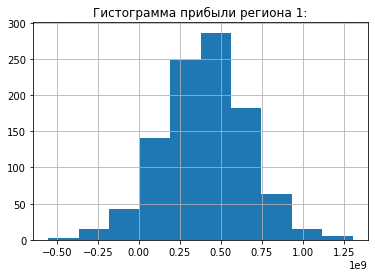


Средняя прибыль для региона 2: 439363670 руб.
Вероятность убытка для региона 2: 1.6%.
95% доверительный интервал для региона 2 лежит между: 31747700 руб. и 845875096 руб.


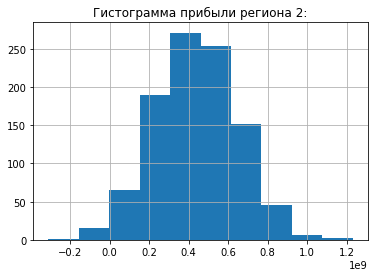


Средняя прибыль для региона 3: 367701927 руб.
Вероятность убытка для региона 3: 8.0%.
95% доверительный интервал для региона 3 лежит между: -169188559 руб. и 877126557 руб.


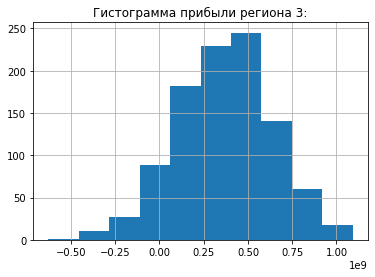

In [11]:
state = RandomState(42)

for i in range(1, 4):
    i = str(i)
    globals()['samples_' + i] = []
    for j in range(1000):
        sample = globals()['product_' + i].sample(n=TOTAL_POINTS, replace=True, random_state=state)
        globals()['samples_' + i].append(profit(prod=sample))
    globals()['samples_' + i] = pd.Series(globals()['samples_' + i])
    print(f"Средняя прибыль для региона {i}: {globals()['samples_' + i].mean():.0f} руб.")
    print(f"Вероятность убытка для региона {i}: {(globals()['samples_' + i] < 0).mean():.1%}.")
    print(
        f"95% доверительный интервал для региона {i} лежит между: \
{globals()['samples_' + i].quantile(0.025):.0f} руб. и {globals()['samples_' + i].quantile(0.975):.0f} руб."
    )
    globals()['samples_' + i].hist()
    plt.title(f'Гистограмма прибыли региона {i}:')
    plt.show()
    print()

### Вывод
Из всех регионов требованию бизнеса в части рисков соответствует только второй регион - здесь вероятность убытка около 1,6%, что менее требуемых 2,5%. Также он характеризуется наиболее высоким уровнем средней прибыли и очень высокой точностью модели, RMSE которой в финансовом эквиваленте меньше 450 000 руб. для скважины, а сама модель оценивается как близкая к идеальной. Однако, сами данные для второго региона выглядят подозрительно, что требует уточнения. Этот факт не позволяет однозначно рекоммендовать к разработке второй регион. Поэтому предлагаем следующие рекоммендации:
- Уточнить у специалистов данные по второму региону (почему низкая частота дискретизации `f1` и `product` в сравнении с остальными регионами), если данные всё-таки корректны, то рекоммендовать второй регион, ориентироваться на полученные для него численные значения;
- Пересмотреть требования по части рисков, возможно стоит рассмотреть первый регион;
- Использовать другие алгоритмы для обучения моделей (например, градиентный бустинг с кросс-валидацией на тренировочной выборке);